In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

import random

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df =df.drop(columns=['tx_date', 'drug', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])

In [4]:
dfs = df.sample(frac=0.1, replace=True, random_state=1)

In [5]:
dfs.head()

,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name,month
4686059,54,G99.93,96934,S76J7V6,NaN,False,13.93,branded,dienulol,5
6762380,24,P07.55,322463,NaN,HO8HUGL,False,11.31,generic,satrade,7
12325960,9,G99.93,539437,NaN,1CAHL,False,15.47,generic,bovirol,12
491263,42,Z66.42,664344,NaN,YY6B1J4E8KJ3,True,0.00,branded,diadaric,1
6662859,34,B05.36,322463,YICC41,MP3IQ,False,71.68,branded,plazamiglutic,7


In [6]:
dfs = dfs[dfs['rejected'] == False]

In [12]:
dfs['pcn'].fillna('gp_'+df['group'], inplace=True)
dfs =dfs.drop(columns=['group'])
dfs['pcn'].fillna(value = 'None', inplace = True)

In [13]:
train_data = dfs.drop(columns=['patient_pay'])
train_label = dfs['patient_pay']

In [15]:
train_pool = Pool(train_data, train_label, cat_features = [0,1,2,3,4,5,6,7])

In [17]:
model = CatBoostRegressor(iterations =2, 
                         depth = 2,
                         learning_rate=1,
                         loss_function = 'RMSE')

In [18]:
model.fit(train_pool)

0:	learn: 28.5802753	total: 356ms	remaining: 356ms
1:	learn: 25.1476888	total: 501ms	remaining: 0us


In [19]:
preds=model.predict(train_data)

In [20]:
print(preds)

[ 13.67574606   4.24691852  13.67574606 ...   4.24691852  13.67574606
 131.624138  ]


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from sklearn.metrics import mean_squared_error

In [29]:
error = mean_squared_error(train_label, preds, squared = False)

In [30]:
print(error)

25.116447853813447


In [31]:
diff = train_label - preds

(array([8.10000e+02, 1.17600e+03, 1.58800e+03, 1.22000e+02, 4.20000e+02,
        5.37000e+02, 2.28100e+03, 2.02500e+03, 4.93100e+03, 2.18800e+03,
        3.55600e+03, 7.15700e+03, 6.39800e+03, 8.06600e+03, 4.12200e+03,
        1.36300e+03, 2.34220e+04, 5.32180e+04, 4.93050e+04, 1.88793e+05,
        3.52677e+05, 3.00108e+05, 3.75000e+04, 2.18320e+04, 1.50570e+04,
        1.37910e+04, 1.07030e+04, 6.06100e+03, 5.33100e+03, 5.46900e+03,
        2.62100e+03, 2.87100e+03, 1.85500e+03, 1.79600e+03, 1.73700e+03,
        1.26200e+03, 1.09900e+03, 7.11000e+02, 2.78000e+02, 1.01000e+02,
        2.41000e+02, 5.47000e+02, 3.76000e+02, 3.45000e+02, 4.84000e+02,
        8.66000e+02, 3.92000e+02, 1.23000e+02, 2.17000e+02, 9.00000e+01,
        1.30000e+02, 1.71000e+02, 3.20000e+01, 4.77000e+02, 1.44000e+02,
        2.40000e+01, 0.00000e+00, 3.00000e+00, 0.00000e+00, 4.30000e+01,
        5.00000e+00, 5.00000e+00, 5.00000e+00, 7.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00

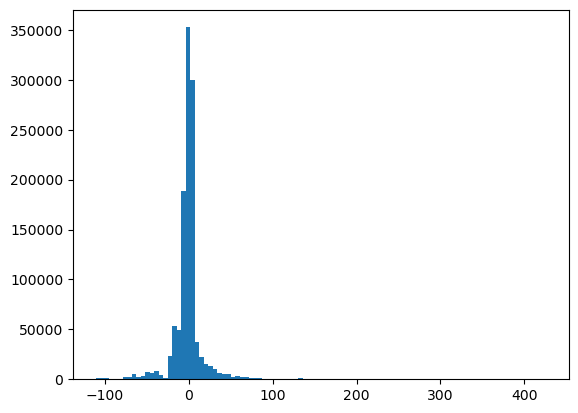

In [33]:
plt.hist(diff, bins=100)

In [ ]:
# import catboost

# w=catboost.MetricVisualizer('/', subdirs= True)
# w.start()

In [35]:
model2 = CatBoostRegressor(iterations =30, 
                         depth = 2,
                         learning_rate=1,
                         loss_function = 'RMSE')
model2.fit(train_pool)

0:	learn: 28.5802753	total: 380ms	remaining: 11s
1:	learn: 25.1476888	total: 706ms	remaining: 9.88s
2:	learn: 23.4056658	total: 1.02s	remaining: 9.18s
3:	learn: 21.6800851	total: 1.21s	remaining: 7.88s
4:	learn: 21.3956738	total: 1.4s	remaining: 7s
5:	learn: 21.1125129	total: 1.61s	remaining: 6.42s
6:	learn: 20.9053498	total: 1.79s	remaining: 5.89s
7:	learn: 20.7949125	total: 1.99s	remaining: 5.46s
8:	learn: 20.7219237	total: 2.17s	remaining: 5.06s
9:	learn: 20.4475095	total: 2.35s	remaining: 4.7s
10:	learn: 20.2486247	total: 2.56s	remaining: 4.42s
11:	learn: 19.9876837	total: 2.75s	remaining: 4.12s
12:	learn: 19.9263588	total: 3s	remaining: 3.92s
13:	learn: 19.8950730	total: 3.2s	remaining: 3.66s
14:	learn: 19.8777687	total: 3.39s	remaining: 3.39s
15:	learn: 19.7994969	total: 3.57s	remaining: 3.13s
16:	learn: 19.7845173	total: 3.76s	remaining: 2.88s
17:	learn: 19.7673064	total: 3.95s	remaining: 2.63s
18:	learn: 19.6850616	total: 4.16s	remaining: 2.41s
19:	learn: 19.6274058	total: 4.35

In [36]:
preds2=model2.predict(train_data)

(array([2.00000e+00, 3.00000e+00, 7.00000e+00, 1.50000e+01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 3.30000e+01, 0.00000e+00,
        0.00000e+00, 7.00000e+00, 3.00000e+01, 2.99000e+02, 1.00000e+02,
        3.31000e+02, 3.44000e+02, 5.23000e+02, 9.39000e+02, 6.09000e+02,
        2.57100e+03, 1.41500e+03, 1.47500e+03, 4.98400e+03, 2.95000e+03,
        2.44900e+03, 6.57200e+03, 8.74100e+03, 1.33430e+04, 4.04290e+04,
        9.23810e+04, 5.02168e+05, 3.32672e+05, 5.21520e+04, 2.87530e+04,
        1.68200e+04, 1.49300e+04, 7.04300e+03, 5.04500e+03, 2.91200e+03,
        2.20200e+03, 1.21600e+03, 8.83000e+02, 3.92000e+02, 2.59000e+02,
        3.26000e+02, 2.26000e+02, 8.70000e+01, 7.90000e+01, 9.60000e+01,
        8.50000e+01, 2.20000e+01, 3.30000e+01, 2.20000e+01, 1.04000e+02,
        5.90000e+01, 8.10000e+01, 2.50000e+01, 1.29000e+02, 6.30000e+01,
        3.40000e+01, 9.40000e+01, 1.14000e+02, 2.20000e+01, 4.30000e+01,
        3.07000e+02, 1.27000e+02, 1.42000e+02, 4.00

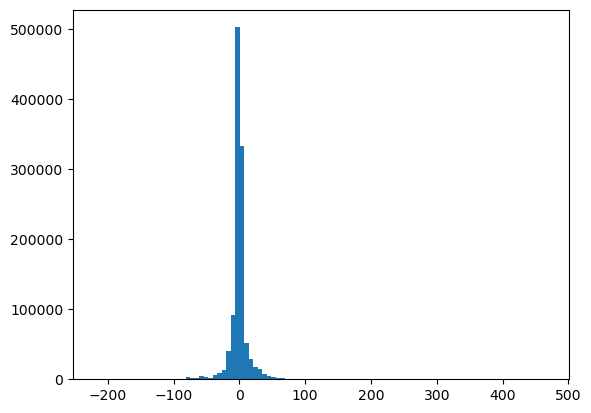

In [37]:
diff2 = train_label - preds2
plt.hist(diff2, bins=100)

In [38]:
mean_squared_error(train_label, preds2, squared = False)

19.021957258541637

In [40]:
model3 = CatBoostRegressor(iterations =30, 
                         depth = 10,
                         learning_rate=1,
                         loss_function = 'RMSE')
model3.fit(train_pool)

0:	learn: 28.3291755	total: 644ms	remaining: 18.7s
1:	learn: 24.4758137	total: 1.49s	remaining: 20.9s
2:	learn: 18.3548984	total: 2.26s	remaining: 20.3s
3:	learn: 17.9322921	total: 3s	remaining: 19.5s
4:	learn: 17.3006239	total: 3.67s	remaining: 18.3s
5:	learn: 17.1759907	total: 4.37s	remaining: 17.5s
6:	learn: 16.4187906	total: 5.03s	remaining: 16.5s
7:	learn: 16.3396673	total: 5.76s	remaining: 15.8s
8:	learn: 16.1996644	total: 6.45s	remaining: 15s
9:	learn: 16.1436617	total: 7.12s	remaining: 14.2s
10:	learn: 16.1017377	total: 7.77s	remaining: 13.4s
11:	learn: 16.0301608	total: 8.43s	remaining: 12.6s
12:	learn: 15.9986592	total: 9.08s	remaining: 11.9s
13:	learn: 15.9663164	total: 9.75s	remaining: 11.1s
14:	learn: 15.9070715	total: 10.5s	remaining: 10.5s
15:	learn: 15.8871806	total: 11.2s	remaining: 9.77s
16:	learn: 15.8638348	total: 11.8s	remaining: 9.04s
17:	learn: 15.8329008	total: 12.5s	remaining: 8.33s
18:	learn: 15.8269858	total: 13.2s	remaining: 7.62s
19:	learn: 15.8180528	total

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 4.00000e+00,
        6.00000e+00, 1.00000e+01, 1.10000e+01, 1.00000e+01, 2.50000e+01,
        5.40000e+01, 2.40000e+01, 1.55000e+02, 2.30000e+02, 1.55000e+02,
        3.07000e+02, 4.53000e+02, 5.62000e+02, 7.81000e+02, 7.17000e+02,
        6.45000e+02, 8.01000e+02, 7.22000e+02, 8.14000e+02, 1.21400e+03,
        2.28900e+03, 2.57300e+03, 2.34100e+03, 3.26000e+03, 8.10200e+03,
        2.10200e+04, 5.67940e+04, 7.68874e+05, 2.15598e+05, 2.37940e+04,
        1.32970e+04, 9.77000e+03, 4.08800e+03, 2.67800e+03, 2.60200e+03,
        1.97800e+03, 7.69000e+02, 4.06000e+02, 1.95000e+02, 2.51000e+02,
        2.22000e+02, 1.85000e+02, 7.70000e+01, 5.50000e+01, 3.60000e+01,
        2.10000e+01, 6.00000e+00, 5.20000e+01, 5.40000e+01, 6.30000e+01,
        3.70000e+01, 5.60000e+01, 4.70000e+01, 1.40000e+02, 6.60000e+01,
        5.20000e+01, 6.50000e+01, 5.60000e+01, 9.10000e+01, 1.58000e+02,
        1.53000e+02, 7.40000e+01, 1.70000e+02, 1.18

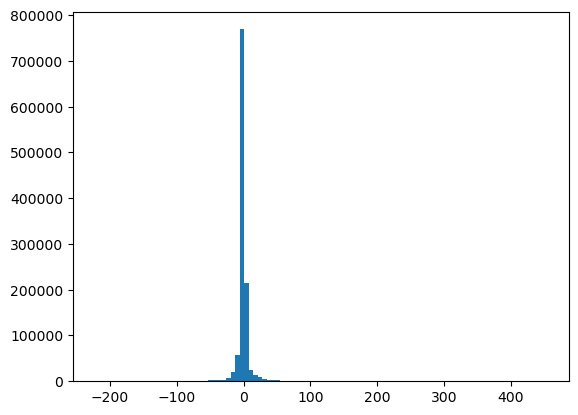

In [41]:
preds3=model3.predict(train_data)
diff3 = train_label - preds3
plt.hist(diff3, bins=100)

In [42]:
mean_squared_error(train_label, preds3, squared = False)

15.619030429134698

In [43]:
model4 = CatBoostRegressor(iterations =100, 
                         depth = 10,
                         learning_rate=1,
                         loss_function = 'RMSE')
model4.fit(train_pool)

0:	learn: 28.3291755	total: 701ms	remaining: 1m 9s
1:	learn: 24.4758137	total: 1.52s	remaining: 1m 14s
2:	learn: 18.3548984	total: 2.26s	remaining: 1m 13s
3:	learn: 17.9322921	total: 3.06s	remaining: 1m 13s
4:	learn: 17.3006239	total: 3.76s	remaining: 1m 11s
5:	learn: 17.1759907	total: 4.46s	remaining: 1m 9s
6:	learn: 16.4187906	total: 5.14s	remaining: 1m 8s
7:	learn: 16.3396673	total: 5.89s	remaining: 1m 7s
8:	learn: 16.1996644	total: 6.62s	remaining: 1m 6s
9:	learn: 16.1436617	total: 7.31s	remaining: 1m 5s
10:	learn: 16.1017377	total: 8.01s	remaining: 1m 4s
11:	learn: 16.0301608	total: 8.69s	remaining: 1m 3s
12:	learn: 15.9986592	total: 9.37s	remaining: 1m 2s
13:	learn: 15.9663164	total: 10.1s	remaining: 1m 1s
14:	learn: 15.9070715	total: 10.8s	remaining: 1m 1s
15:	learn: 15.8871806	total: 11.5s	remaining: 1m
16:	learn: 15.8638348	total: 12.2s	remaining: 59.4s
17:	learn: 15.8329008	total: 12.9s	remaining: 58.5s
18:	learn: 15.8269858	total: 13.5s	remaining: 57.7s
19:	learn: 15.8180528

(array([1.00000e+00, 3.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        6.00000e+00, 7.00000e+00, 2.30000e+01, 2.20000e+01, 2.50000e+01,
        6.30000e+01, 4.90000e+01, 1.32000e+02, 1.97000e+02, 2.11000e+02,
        3.36000e+02, 4.69000e+02, 7.18000e+02, 5.98000e+02, 5.65000e+02,
        7.53000e+02, 6.78000e+02, 8.08000e+02, 7.11000e+02, 1.36100e+03,
        2.59300e+03, 2.29100e+03, 2.52100e+03, 4.28000e+03, 9.14400e+03,
        2.57430e+04, 8.31520e+04, 9.11204e+05, 5.47700e+04, 1.64490e+04,
        1.14890e+04, 6.21900e+03, 3.85300e+03, 2.38600e+03, 2.21200e+03,
        1.27700e+03, 5.00000e+02, 2.37000e+02, 1.79000e+02, 2.66000e+02,
        2.17000e+02, 9.10000e+01, 7.60000e+01, 4.40000e+01, 4.20000e+01,
        4.40000e+01, 5.50000e+01, 3.60000e+01, 2.00000e+01, 5.00000e+01,
        5.50000e+01, 1.10000e+02, 7.30000e+01, 9.20000e+01, 5.60000e+01,
        5.30000e+01, 4.20000e+01, 1.40000e+02, 1.35000e+02, 1.22000e+02,
        1.93000e+02, 1.00000e+02, 1.09000e+02, 9.30

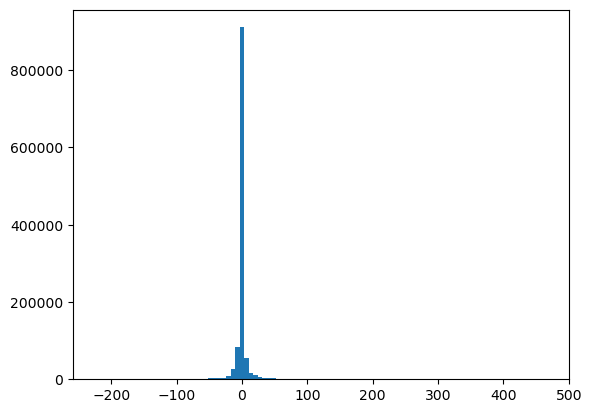

In [45]:
preds4=model4.predict(train_data)
diff4 = train_label - preds4
plt.hist(diff4, bins=100)

In [46]:
mean_squared_error(train_label, preds4, squared = False)

15.360064886885116

In [74]:
from catboost import CatBoost
modelC = CatBoostRegressor(loss_function= 'RMSE')

grid = {'learning_rate' : [.5, 1],
       'depth': [5,20]}

randomized_search_result = modelC.randomized_search(grid,
                                                    X=train_pool,
                                                    n_iter = 50,
                                                    plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 31.1261418	test: 31.8420934	best: 31.8420934 (0)	total: 972ms	remaining: 16m 10s
1:	learn: 23.0827987	test: 23.7135034	best: 23.7135034 (1)	total: 1.65s	remaining: 13m 41s
2:	learn: 20.1798893	test: 20.7465800	best: 20.7465800 (2)	total: 2.27s	remaining: 12m 36s
3:	learn: 19.0087066	test: 19.4602534	best: 19.4602534 (3)	total: 2.77s	remaining: 11m 28s
4:	learn: 18.5850555	test: 19.0038775	best: 19.0038775 (4)	total: 3.42s	remaining: 11m 19s
5:	learn: 18.1257964	test: 18.4870683	best: 18.4870683 (5)	total: 4.03s	remaining: 11m 8s
6:	learn: 16.6311593	test: 16.7776034	best: 16.7776034 (6)	total: 4.94s	remaining: 11m 41s
7:	learn: 16.2746741	test: 16.4397984	best: 16.4397984 (7)	total: 5.55s	remaining: 11m 27s
8:	learn: 16.1769397	test: 16.3478485	best: 16.3478485 (8)	total: 5.94s	remaining: 10m 54s
9:	learn: 16.1122832	test: 16.2831717	best: 16.2831717 (9)	total: 6.5s	remaining: 10m 43s
10:	learn: 15.9876190	test: 16.1554774	best: 16.1554774 (10)	total: 7.34s	remaining: 10m 59s

90:	learn: 13.3643103	test: 13.5485354	best: 13.5485354 (90)	total: 51.4s	remaining: 8m 33s
91:	learn: 13.3420184	test: 13.5311035	best: 13.5311035 (91)	total: 51.9s	remaining: 8m 32s
92:	learn: 13.3215144	test: 13.5238918	best: 13.5238918 (92)	total: 52.3s	remaining: 8m 30s
93:	learn: 13.3137964	test: 13.5157251	best: 13.5157251 (93)	total: 52.9s	remaining: 8m 29s
94:	learn: 13.3077604	test: 13.5166634	best: 13.5157251 (93)	total: 53.4s	remaining: 8m 28s
95:	learn: 13.2895296	test: 13.4976664	best: 13.4976664 (95)	total: 54.1s	remaining: 8m 29s
96:	learn: 13.2819712	test: 13.4914555	best: 13.4914555 (96)	total: 54.6s	remaining: 8m 28s
97:	learn: 13.2685223	test: 13.4810345	best: 13.4810345 (97)	total: 55s	remaining: 8m 26s
98:	learn: 13.2589938	test: 13.4715322	best: 13.4715322 (98)	total: 55.5s	remaining: 8m 24s
99:	learn: 13.2520693	test: 13.4658911	best: 13.4658911 (99)	total: 55.9s	remaining: 8m 23s
100:	learn: 13.2426851	test: 13.4510771	best: 13.4510771 (100)	total: 56.4s	remain

178:	learn: 12.4706469	test: 12.6701789	best: 12.6701789 (178)	total: 1m 37s	remaining: 7m 28s
179:	learn: 12.4324223	test: 12.6124527	best: 12.6124527 (179)	total: 1m 38s	remaining: 7m 27s
180:	learn: 12.4181050	test: 12.6136855	best: 12.6124527 (179)	total: 1m 38s	remaining: 7m 26s
181:	learn: 12.4173787	test: 12.6145384	best: 12.6124527 (179)	total: 1m 39s	remaining: 7m 25s
182:	learn: 12.3999479	test: 12.5583680	best: 12.5583680 (182)	total: 1m 39s	remaining: 7m 25s
183:	learn: 12.3939449	test: 12.5535188	best: 12.5535188 (183)	total: 1m 40s	remaining: 7m 24s
184:	learn: 12.3914776	test: 12.5512203	best: 12.5512203 (184)	total: 1m 40s	remaining: 7m 23s
185:	learn: 12.3882480	test: 12.5483026	best: 12.5483026 (185)	total: 1m 41s	remaining: 7m 22s
186:	learn: 12.3870215	test: 12.5474558	best: 12.5474558 (186)	total: 1m 41s	remaining: 7m 21s
187:	learn: 12.3804258	test: 12.5277743	best: 12.5277743 (187)	total: 1m 42s	remaining: 7m 20s
188:	learn: 12.3769804	test: 12.5269588	best: 12.5

265:	learn: 11.9081674	test: 12.0918720	best: 12.0918720 (265)	total: 2m 23s	remaining: 6m 35s
266:	learn: 11.9055126	test: 12.0912149	best: 12.0912149 (266)	total: 2m 23s	remaining: 6m 34s
267:	learn: 11.9050994	test: 12.0911354	best: 12.0911354 (267)	total: 2m 24s	remaining: 6m 34s
268:	learn: 11.9018415	test: 12.0890157	best: 12.0890157 (268)	total: 2m 24s	remaining: 6m 33s
269:	learn: 11.9004297	test: 12.0892792	best: 12.0890157 (268)	total: 2m 25s	remaining: 6m 33s
270:	learn: 11.8978187	test: 12.0861438	best: 12.0861438 (270)	total: 2m 25s	remaining: 6m 32s
271:	learn: 11.8945480	test: 12.0826581	best: 12.0826581 (271)	total: 2m 26s	remaining: 6m 31s
272:	learn: 11.8938922	test: 12.0820394	best: 12.0820394 (272)	total: 2m 26s	remaining: 6m 31s
273:	learn: 11.8899486	test: 12.0783563	best: 12.0783563 (273)	total: 2m 27s	remaining: 6m 30s
274:	learn: 11.8895929	test: 12.0776218	best: 12.0776218 (274)	total: 2m 27s	remaining: 6m 29s
275:	learn: 11.8825481	test: 12.0696143	best: 12.0

352:	learn: 11.6387137	test: 11.8687769	best: 11.8687769 (352)	total: 3m 11s	remaining: 5m 51s
353:	learn: 11.6383379	test: 11.8688740	best: 11.8687769 (352)	total: 3m 12s	remaining: 5m 51s
354:	learn: 11.6354180	test: 11.8644560	best: 11.8644560 (354)	total: 3m 13s	remaining: 5m 50s
355:	learn: 11.6332076	test: 11.8613158	best: 11.8613158 (355)	total: 3m 13s	remaining: 5m 50s
356:	learn: 11.6289778	test: 11.8618175	best: 11.8613158 (355)	total: 3m 14s	remaining: 5m 49s
357:	learn: 11.6265162	test: 11.8621013	best: 11.8613158 (355)	total: 3m 14s	remaining: 5m 49s
358:	learn: 11.6247619	test: 11.8623413	best: 11.8613158 (355)	total: 3m 15s	remaining: 5m 48s
359:	learn: 11.6183215	test: 11.8606615	best: 11.8606615 (359)	total: 3m 16s	remaining: 5m 48s
360:	learn: 11.6168633	test: 11.8604766	best: 11.8604766 (360)	total: 3m 16s	remaining: 5m 47s
361:	learn: 11.6166410	test: 11.8593937	best: 11.8593937 (361)	total: 3m 17s	remaining: 5m 47s
362:	learn: 11.6161999	test: 11.8589259	best: 11.8

439:	learn: 11.4045659	test: 11.6963659	best: 11.6963659 (439)	total: 3m 57s	remaining: 5m 1s
440:	learn: 11.4043542	test: 11.6962553	best: 11.6962553 (440)	total: 3m 57s	remaining: 5m 1s
441:	learn: 11.4040003	test: 11.6960317	best: 11.6960317 (441)	total: 3m 58s	remaining: 5m
442:	learn: 11.4032980	test: 11.6949904	best: 11.6949904 (442)	total: 3m 58s	remaining: 5m
443:	learn: 11.4019885	test: 11.6950083	best: 11.6949904 (442)	total: 3m 59s	remaining: 4m 59s
444:	learn: 11.4000334	test: 11.6932077	best: 11.6932077 (444)	total: 4m	remaining: 4m 59s
445:	learn: 11.3977776	test: 11.6906399	best: 11.6906399 (445)	total: 4m	remaining: 4m 58s
446:	learn: 11.3969742	test: 11.6899136	best: 11.6899136 (446)	total: 4m	remaining: 4m 58s
447:	learn: 11.3953188	test: 11.6872827	best: 11.6872827 (447)	total: 4m 1s	remaining: 4m 57s
448:	learn: 11.3917701	test: 11.6882416	best: 11.6872827 (447)	total: 4m 1s	remaining: 4m 56s
449:	learn: 11.3873305	test: 11.6871986	best: 11.6871986 (449)	total: 4m 2

526:	learn: 11.2389634	test: 11.5500407	best: 11.5500407 (526)	total: 4m 44s	remaining: 4m 15s
527:	learn: 11.2331573	test: 11.5443067	best: 11.5443067 (527)	total: 4m 44s	remaining: 4m 14s
528:	learn: 11.2302983	test: 11.5412566	best: 11.5412566 (528)	total: 4m 45s	remaining: 4m 14s
529:	learn: 11.2278685	test: 11.5356073	best: 11.5356073 (529)	total: 4m 45s	remaining: 4m 13s
530:	learn: 11.2220957	test: 11.5299013	best: 11.5299013 (530)	total: 4m 46s	remaining: 4m 12s
531:	learn: 11.2178557	test: 11.5221450	best: 11.5221450 (531)	total: 4m 46s	remaining: 4m 12s
532:	learn: 11.2171332	test: 11.5227202	best: 11.5221450 (531)	total: 4m 47s	remaining: 4m 11s
533:	learn: 11.2167062	test: 11.5218198	best: 11.5218198 (533)	total: 4m 47s	remaining: 4m 11s
534:	learn: 11.2141690	test: 11.5187298	best: 11.5187298 (534)	total: 4m 48s	remaining: 4m 10s
535:	learn: 11.2126409	test: 11.5172657	best: 11.5172657 (535)	total: 4m 48s	remaining: 4m 9s
536:	learn: 11.2080752	test: 11.5169443	best: 11.51

613:	learn: 11.0831063	test: 11.3811778	best: 11.3811778 (613)	total: 5m 29s	remaining: 3m 27s
614:	learn: 11.0821228	test: 11.3812912	best: 11.3811778 (613)	total: 5m 29s	remaining: 3m 26s
615:	learn: 11.0819669	test: 11.3810009	best: 11.3810009 (615)	total: 5m 30s	remaining: 3m 25s
616:	learn: 11.0818872	test: 11.3809091	best: 11.3809091 (616)	total: 5m 30s	remaining: 3m 25s
617:	learn: 11.0815462	test: 11.3809302	best: 11.3809091 (616)	total: 5m 31s	remaining: 3m 24s
618:	learn: 11.0808036	test: 11.3808636	best: 11.3808636 (618)	total: 5m 31s	remaining: 3m 24s
619:	learn: 11.0796519	test: 11.3807686	best: 11.3807686 (619)	total: 5m 32s	remaining: 3m 23s
620:	learn: 11.0786864	test: 11.3778736	best: 11.3778736 (620)	total: 5m 32s	remaining: 3m 23s
621:	learn: 11.0778178	test: 11.3772613	best: 11.3772613 (621)	total: 5m 33s	remaining: 3m 22s
622:	learn: 11.0761481	test: 11.3757266	best: 11.3757266 (622)	total: 5m 33s	remaining: 3m 21s
623:	learn: 11.0749939	test: 11.3748379	best: 11.3

700:	learn: 10.8640225	test: 11.1871459	best: 11.1871459 (700)	total: 6m 16s	remaining: 2m 40s
701:	learn: 10.8632385	test: 11.1860331	best: 11.1860331 (701)	total: 6m 16s	remaining: 2m 39s
702:	learn: 10.8615398	test: 11.1833294	best: 11.1833294 (702)	total: 6m 17s	remaining: 2m 39s
703:	learn: 10.8600375	test: 11.1835848	best: 11.1833294 (702)	total: 6m 17s	remaining: 2m 38s
704:	learn: 10.8593899	test: 11.1828212	best: 11.1828212 (704)	total: 6m 18s	remaining: 2m 38s
705:	learn: 10.8582683	test: 11.1828141	best: 11.1828141 (705)	total: 6m 18s	remaining: 2m 37s
706:	learn: 10.8580300	test: 11.1827582	best: 11.1827582 (706)	total: 6m 19s	remaining: 2m 37s
707:	learn: 10.8571570	test: 11.1830444	best: 11.1827582 (706)	total: 6m 19s	remaining: 2m 36s
708:	learn: 10.8537069	test: 11.1759921	best: 11.1759921 (708)	total: 6m 20s	remaining: 2m 36s
709:	learn: 10.8533978	test: 11.1767311	best: 11.1759921 (708)	total: 6m 21s	remaining: 2m 35s
710:	learn: 10.8499220	test: 11.1737448	best: 11.1

787:	learn: 10.6950534	test: 11.0326495	best: 11.0318849 (786)	total: 7m 7s	remaining: 1m 54s
788:	learn: 10.6944115	test: 11.0321400	best: 11.0318849 (786)	total: 7m 8s	remaining: 1m 54s
789:	learn: 10.6847178	test: 11.0146661	best: 11.0146661 (789)	total: 7m 8s	remaining: 1m 53s
790:	learn: 10.6817563	test: 11.0170363	best: 11.0146661 (789)	total: 7m 9s	remaining: 1m 53s
791:	learn: 10.6816537	test: 11.0171949	best: 11.0146661 (789)	total: 7m 9s	remaining: 1m 52s
792:	learn: 10.6814954	test: 11.0170141	best: 11.0146661 (789)	total: 7m 10s	remaining: 1m 52s
793:	learn: 10.6794699	test: 11.0147936	best: 11.0146661 (789)	total: 7m 10s	remaining: 1m 51s
794:	learn: 10.6790037	test: 11.0149137	best: 11.0146661 (789)	total: 7m 11s	remaining: 1m 51s
795:	learn: 10.6779706	test: 11.0161621	best: 11.0146661 (789)	total: 7m 11s	remaining: 1m 50s
796:	learn: 10.6778343	test: 11.0162246	best: 11.0146661 (789)	total: 7m 12s	remaining: 1m 50s
797:	learn: 10.6756167	test: 11.0138232	best: 11.013823

874:	learn: 10.6077712	test: 10.9635658	best: 10.9635658 (874)	total: 7m 54s	remaining: 1m 7s
875:	learn: 10.6063815	test: 10.9634878	best: 10.9634878 (875)	total: 7m 55s	remaining: 1m 7s
876:	learn: 10.6057165	test: 10.9633197	best: 10.9633197 (876)	total: 7m 55s	remaining: 1m 6s
877:	learn: 10.6049016	test: 10.9630664	best: 10.9630664 (877)	total: 7m 56s	remaining: 1m 6s
878:	learn: 10.6046601	test: 10.9630472	best: 10.9630472 (878)	total: 7m 56s	remaining: 1m 5s
879:	learn: 10.6044018	test: 10.9629532	best: 10.9629532 (879)	total: 7m 57s	remaining: 1m 5s
880:	learn: 10.6041510	test: 10.9628596	best: 10.9628596 (880)	total: 7m 57s	remaining: 1m 4s
881:	learn: 10.6036558	test: 10.9627245	best: 10.9627245 (881)	total: 7m 58s	remaining: 1m 3s
882:	learn: 10.6035277	test: 10.9625183	best: 10.9625183 (882)	total: 7m 58s	remaining: 1m 3s
883:	learn: 10.5914261	test: 10.9475782	best: 10.9475782 (883)	total: 7m 59s	remaining: 1m 2s
884:	learn: 10.5897412	test: 10.9486477	best: 10.9475782 (88

962:	learn: 10.5054919	test: 10.9065485	best: 10.9027815 (952)	total: 8m 39s	remaining: 20s
963:	learn: 10.5031664	test: 10.9034295	best: 10.9027815 (952)	total: 8m 40s	remaining: 19.4s
964:	learn: 10.4996845	test: 10.9001919	best: 10.9001919 (964)	total: 8m 40s	remaining: 18.9s
965:	learn: 10.4990657	test: 10.8996204	best: 10.8996204 (965)	total: 8m 41s	remaining: 18.3s
966:	learn: 10.4984383	test: 10.8992662	best: 10.8992662 (966)	total: 8m 41s	remaining: 17.8s
967:	learn: 10.4982778	test: 10.8992674	best: 10.8992662 (966)	total: 8m 42s	remaining: 17.3s
968:	learn: 10.4977844	test: 10.8992443	best: 10.8992443 (968)	total: 8m 42s	remaining: 16.7s
969:	learn: 10.4965985	test: 10.8989549	best: 10.8989549 (969)	total: 8m 43s	remaining: 16.2s
970:	learn: 10.4953856	test: 10.8986767	best: 10.8986767 (970)	total: 8m 43s	remaining: 15.6s
971:	learn: 10.4951656	test: 10.8986674	best: 10.8986674 (971)	total: 8m 43s	remaining: 15.1s
972:	learn: 10.4943860	test: 10.8983507	best: 10.8983507 (972)

50:	learn: 13.6221725	test: 13.6068824	best: 13.6068824 (50)	total: 29.1s	remaining: 9m 1s
51:	learn: 13.6083254	test: 13.5856772	best: 13.5856772 (51)	total: 29.5s	remaining: 8m 58s
52:	learn: 13.6029437	test: 13.5841298	best: 13.5841298 (52)	total: 30s	remaining: 8m 56s
53:	learn: 13.5749061	test: 13.5166513	best: 13.5166513 (53)	total: 30.4s	remaining: 8m 53s
54:	learn: 13.5569530	test: 13.5080695	best: 13.5080695 (54)	total: 30.9s	remaining: 8m 50s
55:	learn: 13.5379239	test: 13.4927524	best: 13.4927524 (55)	total: 31.3s	remaining: 8m 47s
56:	learn: 13.5225621	test: 13.4754250	best: 13.4754250 (56)	total: 31.8s	remaining: 8m 45s
57:	learn: 13.5059331	test: 13.4595992	best: 13.4595992 (57)	total: 32.2s	remaining: 8m 43s
58:	learn: 13.4949104	test: 13.4489340	best: 13.4489340 (58)	total: 32.7s	remaining: 8m 41s
59:	learn: 13.4858196	test: 13.4363572	best: 13.4363572 (59)	total: 33.1s	remaining: 8m 39s
60:	learn: 13.4678969	test: 13.4421263	best: 13.4363572 (59)	total: 33.6s	remaining

139:	learn: 12.5001497	test: 12.5435253	best: 12.5435253 (139)	total: 1m 11s	remaining: 7m 18s
140:	learn: 12.4980336	test: 12.5415155	best: 12.5415155 (140)	total: 1m 11s	remaining: 7m 17s
141:	learn: 12.4930146	test: 12.5341858	best: 12.5341858 (141)	total: 1m 12s	remaining: 7m 16s
142:	learn: 12.4848950	test: 12.5313336	best: 12.5313336 (142)	total: 1m 12s	remaining: 7m 15s
143:	learn: 12.4785905	test: 12.5279980	best: 12.5279980 (143)	total: 1m 13s	remaining: 7m 14s
144:	learn: 12.4758012	test: 12.5204692	best: 12.5204692 (144)	total: 1m 13s	remaining: 7m 13s
145:	learn: 12.4607459	test: 12.4874113	best: 12.4874113 (145)	total: 1m 14s	remaining: 7m 14s
146:	learn: 12.3795501	test: 12.4346932	best: 12.4346932 (146)	total: 1m 14s	remaining: 7m 14s
147:	learn: 12.3498864	test: 12.4110004	best: 12.4110004 (147)	total: 1m 15s	remaining: 7m 16s
148:	learn: 12.3361345	test: 12.3890741	best: 12.3890741 (148)	total: 1m 16s	remaining: 7m 16s
149:	learn: 12.3297103	test: 12.3907607	best: 12.3

226:	learn: 11.8383569	test: 12.0643269	best: 12.0643269 (226)	total: 1m 56s	remaining: 6m 35s
227:	learn: 11.8314990	test: 12.0617305	best: 12.0617305 (227)	total: 1m 56s	remaining: 6m 35s
228:	learn: 11.8220632	test: 12.0498079	best: 12.0498079 (228)	total: 1m 57s	remaining: 6m 34s
229:	learn: 11.8189533	test: 12.0471563	best: 12.0471563 (229)	total: 1m 57s	remaining: 6m 34s
230:	learn: 11.8185753	test: 12.0469624	best: 12.0469624 (230)	total: 1m 58s	remaining: 6m 33s
231:	learn: 11.8155990	test: 12.0389858	best: 12.0389858 (231)	total: 1m 58s	remaining: 6m 32s
232:	learn: 11.8153145	test: 12.0391817	best: 12.0389858 (231)	total: 1m 58s	remaining: 6m 31s
233:	learn: 11.8134791	test: 12.0417576	best: 12.0389858 (231)	total: 1m 59s	remaining: 6m 30s
234:	learn: 11.8114554	test: 12.0413509	best: 12.0389858 (231)	total: 1m 59s	remaining: 6m 30s
235:	learn: 11.8095853	test: 12.0395203	best: 12.0389858 (231)	total: 2m	remaining: 6m 29s
236:	learn: 11.8079672	test: 12.0386158	best: 12.03861

313:	learn: 11.5187806	test: 11.7535818	best: 11.7505253 (312)	total: 2m 36s	remaining: 5m 42s
314:	learn: 11.5118494	test: 11.7437593	best: 11.7437593 (314)	total: 2m 37s	remaining: 5m 42s
315:	learn: 11.5110795	test: 11.7437456	best: 11.7437456 (315)	total: 2m 37s	remaining: 5m 41s
316:	learn: 11.5108857	test: 11.7439743	best: 11.7437456 (315)	total: 2m 38s	remaining: 5m 41s
317:	learn: 11.5094273	test: 11.7414046	best: 11.7414046 (317)	total: 2m 39s	remaining: 5m 41s
318:	learn: 11.5058618	test: 11.7393725	best: 11.7393725 (318)	total: 2m 39s	remaining: 5m 40s
319:	learn: 11.5045370	test: 11.7310652	best: 11.7310652 (319)	total: 2m 40s	remaining: 5m 40s
320:	learn: 11.5018814	test: 11.7344297	best: 11.7310652 (319)	total: 2m 40s	remaining: 5m 39s
321:	learn: 11.5015289	test: 11.7353702	best: 11.7310652 (319)	total: 2m 40s	remaining: 5m 38s
322:	learn: 11.4991463	test: 11.7344637	best: 11.7310652 (319)	total: 2m 41s	remaining: 5m 38s
323:	learn: 11.4980584	test: 11.7344027	best: 11.7

400:	learn: 11.3014416	test: 11.5572578	best: 11.5571077 (399)	total: 3m 21s	remaining: 5m 1s
401:	learn: 11.2995066	test: 11.5588451	best: 11.5571077 (399)	total: 3m 22s	remaining: 5m 1s
402:	learn: 11.2934434	test: 11.5592767	best: 11.5571077 (399)	total: 3m 23s	remaining: 5m
403:	learn: 11.2913097	test: 11.5595657	best: 11.5571077 (399)	total: 3m 23s	remaining: 5m
404:	learn: 11.2904194	test: 11.5579649	best: 11.5571077 (399)	total: 3m 23s	remaining: 4m 59s
405:	learn: 11.2885460	test: 11.5590927	best: 11.5571077 (399)	total: 3m 24s	remaining: 4m 58s
406:	learn: 11.2856535	test: 11.5600537	best: 11.5571077 (399)	total: 3m 24s	remaining: 4m 58s
407:	learn: 11.2834940	test: 11.5573467	best: 11.5571077 (399)	total: 3m 25s	remaining: 4m 57s
408:	learn: 11.2796498	test: 11.5629471	best: 11.5571077 (399)	total: 3m 25s	remaining: 4m 57s
409:	learn: 11.2750732	test: 11.5539945	best: 11.5539945 (409)	total: 3m 26s	remaining: 4m 57s
410:	learn: 11.2659887	test: 11.5495797	best: 11.5495797 (41

487:	learn: 11.0547685	test: 11.3955156	best: 11.3955156 (487)	total: 4m 7s	remaining: 4m 19s
488:	learn: 11.0542838	test: 11.3952199	best: 11.3952199 (488)	total: 4m 8s	remaining: 4m 19s
489:	learn: 11.0526079	test: 11.3941309	best: 11.3941309 (489)	total: 4m 8s	remaining: 4m 18s
490:	learn: 11.0505012	test: 11.3935141	best: 11.3935141 (490)	total: 4m 9s	remaining: 4m 18s
491:	learn: 11.0500136	test: 11.3937976	best: 11.3935141 (490)	total: 4m 9s	remaining: 4m 17s
492:	learn: 11.0488706	test: 11.3935352	best: 11.3935141 (490)	total: 4m 10s	remaining: 4m 17s
493:	learn: 11.0487325	test: 11.3935305	best: 11.3935141 (490)	total: 4m 10s	remaining: 4m 17s
494:	learn: 11.0468245	test: 11.3931874	best: 11.3931874 (494)	total: 4m 11s	remaining: 4m 16s
495:	learn: 11.0441552	test: 11.3916289	best: 11.3916289 (495)	total: 4m 11s	remaining: 4m 15s
496:	learn: 11.0432467	test: 11.3926774	best: 11.3916289 (495)	total: 4m 12s	remaining: 4m 15s
497:	learn: 11.0419064	test: 11.3923054	best: 11.391628

574:	learn: 10.8210432	test: 11.1666621	best: 11.1666621 (574)	total: 4m 53s	remaining: 3m 37s
575:	learn: 10.8198230	test: 11.1652263	best: 11.1652263 (575)	total: 4m 54s	remaining: 3m 36s
576:	learn: 10.8190818	test: 11.1656227	best: 11.1652263 (575)	total: 4m 54s	remaining: 3m 36s
577:	learn: 10.8172409	test: 11.1635682	best: 11.1635682 (577)	total: 4m 55s	remaining: 3m 35s
578:	learn: 10.8163816	test: 11.1634506	best: 11.1634506 (578)	total: 4m 56s	remaining: 3m 35s
579:	learn: 10.8147005	test: 11.1613060	best: 11.1613060 (579)	total: 4m 56s	remaining: 3m 34s
580:	learn: 10.8134531	test: 11.1611049	best: 11.1611049 (580)	total: 4m 57s	remaining: 3m 34s
581:	learn: 10.8117435	test: 11.1590169	best: 11.1590169 (581)	total: 4m 57s	remaining: 3m 33s
582:	learn: 10.8105398	test: 11.1484399	best: 11.1484399 (582)	total: 4m 57s	remaining: 3m 33s
583:	learn: 10.8102452	test: 11.1485907	best: 11.1484399 (582)	total: 4m 58s	remaining: 3m 32s
584:	learn: 10.8094202	test: 11.1471460	best: 11.1

661:	learn: 10.5948024	test: 10.9846873	best: 10.9846873 (661)	total: 5m 42s	remaining: 2m 54s
662:	learn: 10.5920294	test: 10.9847931	best: 10.9846873 (661)	total: 5m 42s	remaining: 2m 54s
663:	learn: 10.5892629	test: 10.9895918	best: 10.9846873 (661)	total: 5m 43s	remaining: 2m 53s
664:	learn: 10.5862807	test: 10.9889405	best: 10.9846873 (661)	total: 5m 43s	remaining: 2m 53s
665:	learn: 10.5858247	test: 10.9878798	best: 10.9846873 (661)	total: 5m 44s	remaining: 2m 52s
666:	learn: 10.5837651	test: 10.9850864	best: 10.9846873 (661)	total: 5m 45s	remaining: 2m 52s
667:	learn: 10.5832075	test: 10.9844322	best: 10.9844322 (667)	total: 5m 45s	remaining: 2m 51s
668:	learn: 10.5825626	test: 10.9824262	best: 10.9824262 (668)	total: 5m 46s	remaining: 2m 51s
669:	learn: 10.5801920	test: 10.9709966	best: 10.9709966 (669)	total: 5m 47s	remaining: 2m 51s
670:	learn: 10.5789382	test: 10.9698980	best: 10.9698980 (670)	total: 5m 47s	remaining: 2m 50s
671:	learn: 10.5725010	test: 10.9671510	best: 10.9

748:	learn: 10.4439629	test: 10.8860188	best: 10.8860188 (748)	total: 6m 32s	remaining: 2m 11s
749:	learn: 10.4414348	test: 10.8717884	best: 10.8717884 (749)	total: 6m 32s	remaining: 2m 10s
750:	learn: 10.4360360	test: 10.8693882	best: 10.8693882 (750)	total: 6m 33s	remaining: 2m 10s
751:	learn: 10.4353456	test: 10.8695131	best: 10.8693882 (750)	total: 6m 33s	remaining: 2m 9s
752:	learn: 10.4338263	test: 10.8676402	best: 10.8676402 (752)	total: 6m 34s	remaining: 2m 9s
753:	learn: 10.4319377	test: 10.8598555	best: 10.8598555 (753)	total: 6m 34s	remaining: 2m 8s
754:	learn: 10.4312780	test: 10.8595401	best: 10.8595401 (754)	total: 6m 35s	remaining: 2m 8s
755:	learn: 10.4285495	test: 10.8462101	best: 10.8462101 (755)	total: 6m 35s	remaining: 2m 7s
756:	learn: 10.4257133	test: 10.8450615	best: 10.8450615 (756)	total: 6m 36s	remaining: 2m 7s
757:	learn: 10.4231020	test: 10.8439099	best: 10.8439099 (757)	total: 6m 36s	remaining: 2m 6s
758:	learn: 10.4216840	test: 10.8415566	best: 10.8415566 

835:	learn: 10.3253392	test: 10.7644531	best: 10.7644531 (835)	total: 7m 17s	remaining: 1m 25s
836:	learn: 10.3235934	test: 10.7634603	best: 10.7634603 (836)	total: 7m 18s	remaining: 1m 25s
837:	learn: 10.3229094	test: 10.7629914	best: 10.7629914 (837)	total: 7m 18s	remaining: 1m 24s
838:	learn: 10.3223828	test: 10.7627666	best: 10.7627666 (838)	total: 7m 19s	remaining: 1m 24s
839:	learn: 10.3196333	test: 10.7599666	best: 10.7599666 (839)	total: 7m 19s	remaining: 1m 23s
840:	learn: 10.2967848	test: 10.7621321	best: 10.7599666 (839)	total: 7m 20s	remaining: 1m 23s
841:	learn: 10.2892643	test: 10.7459828	best: 10.7459828 (841)	total: 7m 20s	remaining: 1m 22s
842:	learn: 10.2864917	test: 10.7427047	best: 10.7427047 (842)	total: 7m 21s	remaining: 1m 22s
843:	learn: 10.2838806	test: 10.7439098	best: 10.7427047 (842)	total: 7m 21s	remaining: 1m 21s
844:	learn: 10.2828548	test: 10.7453273	best: 10.7427047 (842)	total: 7m 22s	remaining: 1m 21s
845:	learn: 10.2820680	test: 10.7466651	best: 10.7

923:	learn: 10.1875629	test: 10.7069106	best: 10.7069106 (923)	total: 8m 4s	remaining: 39.9s
924:	learn: 10.1863624	test: 10.7033362	best: 10.7033362 (924)	total: 8m 5s	remaining: 39.4s
925:	learn: 10.1854465	test: 10.6989366	best: 10.6989366 (925)	total: 8m 5s	remaining: 38.8s
926:	learn: 10.1844515	test: 10.6978008	best: 10.6978008 (926)	total: 8m 6s	remaining: 38.3s
927:	learn: 10.1839257	test: 10.6974707	best: 10.6974707 (927)	total: 8m 6s	remaining: 37.8s
928:	learn: 10.1827761	test: 10.6969844	best: 10.6969844 (928)	total: 8m 7s	remaining: 37.2s
929:	learn: 10.1808221	test: 10.6919460	best: 10.6919460 (929)	total: 8m 7s	remaining: 36.7s
930:	learn: 10.1780705	test: 10.6883487	best: 10.6883487 (930)	total: 8m 8s	remaining: 36.2s
931:	learn: 10.1765562	test: 10.6879744	best: 10.6879744 (931)	total: 8m 8s	remaining: 35.7s
932:	learn: 10.1754150	test: 10.6878431	best: 10.6878431 (932)	total: 8m 9s	remaining: 35.1s
933:	learn: 10.1749517	test: 10.6883425	best: 10.6878431 (932)	total: 

9:	learn: 17.2769598	test: 16.8035370	best: 16.8035370 (9)	total: 5.49s	remaining: 9m 3s
10:	learn: 17.1924223	test: 16.7361465	best: 16.7361465 (10)	total: 5.86s	remaining: 8m 46s
11:	learn: 17.0976365	test: 16.6553703	best: 16.6553703 (11)	total: 6.33s	remaining: 8m 41s
12:	learn: 16.8865492	test: 16.5262758	best: 16.5262758 (12)	total: 7.02s	remaining: 8m 52s
13:	learn: 16.7734196	test: 16.6165014	best: 16.5262758 (12)	total: 7.51s	remaining: 8m 49s
14:	learn: 16.7487834	test: 16.5904947	best: 16.5262758 (12)	total: 8.25s	remaining: 9m 2s
15:	learn: 16.6600703	test: 16.3739072	best: 16.3739072 (15)	total: 8.95s	remaining: 9m 10s
16:	learn: 16.5191300	test: 16.3454703	best: 16.3454703 (16)	total: 9.43s	remaining: 9m 5s
17:	learn: 16.4671219	test: 16.2844805	best: 16.2844805 (17)	total: 9.93s	remaining: 9m 1s
18:	learn: 16.4347731	test: 16.2536416	best: 16.2536416 (18)	total: 10.4s	remaining: 8m 58s
19:	learn: 16.3927224	test: 16.2309787	best: 16.2309787 (19)	total: 10.9s	remaining: 8

99:	learn: 12.8726359	test: 12.7387068	best: 12.7387068 (99)	total: 46.4s	remaining: 6m 57s
100:	learn: 12.8601399	test: 12.7438929	best: 12.7387068 (99)	total: 46.7s	remaining: 6m 56s
101:	learn: 12.8389033	test: 12.7427233	best: 12.7387068 (99)	total: 47.1s	remaining: 6m 54s
102:	learn: 12.8165801	test: 12.7270594	best: 12.7270594 (102)	total: 47.5s	remaining: 6m 53s
103:	learn: 12.8087237	test: 12.7136956	best: 12.7136956 (103)	total: 47.8s	remaining: 6m 52s
104:	learn: 12.8077809	test: 12.7139325	best: 12.7136956 (103)	total: 48.2s	remaining: 6m 50s
105:	learn: 12.7929025	test: 12.7032097	best: 12.7032097 (105)	total: 48.6s	remaining: 6m 49s
106:	learn: 12.7864059	test: 12.6961482	best: 12.6961482 (106)	total: 48.9s	remaining: 6m 48s
107:	learn: 12.7815289	test: 12.6987507	best: 12.6961482 (106)	total: 49.4s	remaining: 6m 47s
108:	learn: 12.7772425	test: 12.6967705	best: 12.6961482 (106)	total: 49.8s	remaining: 6m 46s
109:	learn: 12.7740812	test: 12.6947925	best: 12.6947925 (109)	t

186:	learn: 12.1189643	test: 12.1250421	best: 12.1250421 (186)	total: 1m 25s	remaining: 6m 10s
187:	learn: 12.1118827	test: 12.1159631	best: 12.1159631 (187)	total: 1m 25s	remaining: 6m 9s
188:	learn: 12.1112188	test: 12.1165770	best: 12.1159631 (187)	total: 1m 25s	remaining: 6m 8s
189:	learn: 12.1099252	test: 12.1144502	best: 12.1144502 (189)	total: 1m 26s	remaining: 6m 7s
190:	learn: 12.1094110	test: 12.1145380	best: 12.1144502 (189)	total: 1m 26s	remaining: 6m 7s
191:	learn: 12.1044880	test: 12.1085075	best: 12.1085075 (191)	total: 1m 27s	remaining: 6m 6s
192:	learn: 12.0980818	test: 12.1010638	best: 12.1010638 (192)	total: 1m 27s	remaining: 6m 5s
193:	learn: 12.0938319	test: 12.0965324	best: 12.0965324 (193)	total: 1m 27s	remaining: 6m 4s
194:	learn: 12.0863978	test: 12.0985039	best: 12.0965324 (193)	total: 1m 28s	remaining: 6m 4s
195:	learn: 12.0843898	test: 12.0974001	best: 12.0965324 (193)	total: 1m 28s	remaining: 6m 3s
196:	learn: 12.0765896	test: 12.0996025	best: 12.0965324 (1

273:	learn: 11.6703978	test: 11.7215500	best: 11.7215500 (273)	total: 2m 1s	remaining: 5m 22s
274:	learn: 11.6652925	test: 11.7225980	best: 11.7215500 (273)	total: 2m 2s	remaining: 5m 21s
275:	learn: 11.6644455	test: 11.7223603	best: 11.7215500 (273)	total: 2m 2s	remaining: 5m 21s
276:	learn: 11.6584846	test: 11.7152381	best: 11.7152381 (276)	total: 2m 2s	remaining: 5m 20s
277:	learn: 11.6464779	test: 11.6804190	best: 11.6804190 (277)	total: 2m 3s	remaining: 5m 20s
278:	learn: 11.6446498	test: 11.6808092	best: 11.6804190 (277)	total: 2m 3s	remaining: 5m 19s
279:	learn: 11.6426718	test: 11.6782574	best: 11.6782574 (279)	total: 2m 4s	remaining: 5m 18s
280:	learn: 11.6396334	test: 11.6721399	best: 11.6721399 (280)	total: 2m 4s	remaining: 5m 18s
281:	learn: 11.6362114	test: 11.6688095	best: 11.6688095 (281)	total: 2m 4s	remaining: 5m 17s
282:	learn: 11.6257112	test: 11.6683777	best: 11.6683777 (282)	total: 2m 5s	remaining: 5m 17s
283:	learn: 11.6218203	test: 11.6639820	best: 11.6639820 (28

360:	learn: 11.2561510	test: 11.2881646	best: 11.2869572 (359)	total: 2m 37s	remaining: 4m 38s
361:	learn: 11.2549816	test: 11.2878459	best: 11.2869572 (359)	total: 2m 37s	remaining: 4m 37s
362:	learn: 11.2530584	test: 11.2852838	best: 11.2852838 (362)	total: 2m 38s	remaining: 4m 37s
363:	learn: 11.2458746	test: 11.2792069	best: 11.2792069 (363)	total: 2m 38s	remaining: 4m 36s
364:	learn: 11.2362924	test: 11.2758464	best: 11.2758464 (364)	total: 2m 38s	remaining: 4m 36s
365:	learn: 11.2347182	test: 11.2747834	best: 11.2747834 (365)	total: 2m 39s	remaining: 4m 35s
366:	learn: 11.2266371	test: 11.2812150	best: 11.2747834 (365)	total: 2m 39s	remaining: 4m 35s
367:	learn: 11.2201781	test: 11.2671921	best: 11.2671921 (367)	total: 2m 40s	remaining: 4m 35s
368:	learn: 11.2075786	test: 11.2829201	best: 11.2671921 (367)	total: 2m 41s	remaining: 4m 35s
369:	learn: 11.2030698	test: 11.2696605	best: 11.2671921 (367)	total: 2m 41s	remaining: 4m 35s
370:	learn: 11.2020552	test: 11.2700783	best: 11.2

447:	learn: 10.9668129	test: 11.0687063	best: 11.0684483 (445)	total: 3m 17s	remaining: 4m 3s
448:	learn: 10.9656431	test: 11.0599439	best: 11.0599439 (448)	total: 3m 18s	remaining: 4m 3s
449:	learn: 10.9610970	test: 11.0570021	best: 11.0570021 (449)	total: 3m 18s	remaining: 4m 2s
450:	learn: 10.9593518	test: 11.0558716	best: 11.0558716 (450)	total: 3m 19s	remaining: 4m 2s
451:	learn: 10.9569925	test: 11.0552698	best: 11.0552698 (451)	total: 3m 19s	remaining: 4m 1s
452:	learn: 10.9550438	test: 11.0550630	best: 11.0550630 (452)	total: 3m 19s	remaining: 4m 1s
453:	learn: 10.9508060	test: 11.0534928	best: 11.0534928 (453)	total: 3m 20s	remaining: 4m
454:	learn: 10.9479121	test: 11.0558673	best: 11.0534928 (453)	total: 3m 20s	remaining: 4m
455:	learn: 10.9476277	test: 11.0560098	best: 11.0534928 (453)	total: 3m 20s	remaining: 3m 59s
456:	learn: 10.9456576	test: 11.0524304	best: 11.0524304 (456)	total: 3m 21s	remaining: 3m 59s
457:	learn: 10.9433124	test: 11.0488076	best: 11.0488076 (457)	t

534:	learn: 10.8066779	test: 10.9840865	best: 10.9823291 (526)	total: 3m 51s	remaining: 3m 21s
535:	learn: 10.8027454	test: 10.9809124	best: 10.9809124 (535)	total: 3m 51s	remaining: 3m 20s
536:	learn: 10.8010093	test: 10.9815544	best: 10.9809124 (535)	total: 3m 52s	remaining: 3m 20s
537:	learn: 10.8008049	test: 10.9818751	best: 10.9809124 (535)	total: 3m 52s	remaining: 3m 19s
538:	learn: 10.7992585	test: 10.9800508	best: 10.9800508 (538)	total: 3m 52s	remaining: 3m 19s
539:	learn: 10.7985179	test: 10.9782611	best: 10.9782611 (539)	total: 3m 53s	remaining: 3m 18s
540:	learn: 10.7941196	test: 10.9843506	best: 10.9782611 (539)	total: 3m 53s	remaining: 3m 18s
541:	learn: 10.7935197	test: 10.9842388	best: 10.9782611 (539)	total: 3m 54s	remaining: 3m 17s
542:	learn: 10.7924160	test: 10.9831021	best: 10.9782611 (539)	total: 3m 54s	remaining: 3m 17s
543:	learn: 10.7922564	test: 10.9836092	best: 10.9782611 (539)	total: 3m 55s	remaining: 3m 17s
544:	learn: 10.7910882	test: 10.9839776	best: 10.9

621:	learn: 10.6823815	test: 10.9115545	best: 10.9115545 (621)	total: 4m 27s	remaining: 2m 42s
622:	learn: 10.6817539	test: 10.9108324	best: 10.9108324 (622)	total: 4m 28s	remaining: 2m 42s
623:	learn: 10.6805037	test: 10.9102627	best: 10.9102627 (623)	total: 4m 28s	remaining: 2m 41s
624:	learn: 10.6800634	test: 10.9102902	best: 10.9102627 (623)	total: 4m 28s	remaining: 2m 41s
625:	learn: 10.6793274	test: 10.9095012	best: 10.9095012 (625)	total: 4m 29s	remaining: 2m 40s
626:	learn: 10.6766247	test: 10.9075810	best: 10.9075810 (626)	total: 4m 29s	remaining: 2m 40s
627:	learn: 10.6754805	test: 10.9069132	best: 10.9069132 (627)	total: 4m 30s	remaining: 2m 39s
628:	learn: 10.6741375	test: 10.9047871	best: 10.9047871 (628)	total: 4m 30s	remaining: 2m 39s
629:	learn: 10.6734140	test: 10.9033636	best: 10.9033636 (629)	total: 4m 30s	remaining: 2m 39s
630:	learn: 10.6730309	test: 10.9034639	best: 10.9033636 (629)	total: 4m 31s	remaining: 2m 38s
631:	learn: 10.6722707	test: 10.9032234	best: 10.9

708:	learn: 10.5191991	test: 10.8124772	best: 10.8080716 (703)	total: 5m 2s	remaining: 2m 4s
709:	learn: 10.5171946	test: 10.8133065	best: 10.8080716 (703)	total: 5m 3s	remaining: 2m 3s
710:	learn: 10.5159607	test: 10.8041229	best: 10.8041229 (710)	total: 5m 3s	remaining: 2m 3s
711:	learn: 10.5105653	test: 10.7876637	best: 10.7876637 (711)	total: 5m 4s	remaining: 2m 3s
712:	learn: 10.5101846	test: 10.7877386	best: 10.7876637 (711)	total: 5m 4s	remaining: 2m 2s
713:	learn: 10.5087671	test: 10.7870502	best: 10.7870502 (713)	total: 5m 4s	remaining: 2m 2s
714:	learn: 10.5083998	test: 10.7868126	best: 10.7868126 (714)	total: 5m 5s	remaining: 2m 1s
715:	learn: 10.5067318	test: 10.7827482	best: 10.7827482 (715)	total: 5m 5s	remaining: 2m 1s
716:	learn: 10.5060068	test: 10.7833795	best: 10.7827482 (715)	total: 5m 6s	remaining: 2m
717:	learn: 10.5050471	test: 10.7831091	best: 10.7827482 (715)	total: 5m 6s	remaining: 2m
718:	learn: 10.5045544	test: 10.7828559	best: 10.7827482 (715)	total: 5m 6s	

795:	learn: 10.4148273	test: 10.7477062	best: 10.7439010 (791)	total: 5m 38s	remaining: 1m 26s
796:	learn: 10.4136084	test: 10.7493737	best: 10.7439010 (791)	total: 5m 39s	remaining: 1m 26s
797:	learn: 10.4128471	test: 10.7486318	best: 10.7439010 (791)	total: 5m 39s	remaining: 1m 25s
798:	learn: 10.4125042	test: 10.7483136	best: 10.7439010 (791)	total: 5m 39s	remaining: 1m 25s
799:	learn: 10.4112412	test: 10.7475028	best: 10.7439010 (791)	total: 5m 40s	remaining: 1m 25s
800:	learn: 10.4111819	test: 10.7474248	best: 10.7439010 (791)	total: 5m 40s	remaining: 1m 24s
801:	learn: 10.4106241	test: 10.7462626	best: 10.7439010 (791)	total: 5m 40s	remaining: 1m 24s
802:	learn: 10.4090118	test: 10.7467693	best: 10.7439010 (791)	total: 5m 41s	remaining: 1m 23s
803:	learn: 10.4053245	test: 10.7409159	best: 10.7409159 (803)	total: 5m 41s	remaining: 1m 23s
804:	learn: 10.4039848	test: 10.7395698	best: 10.7395698 (804)	total: 5m 42s	remaining: 1m 22s
805:	learn: 10.4032169	test: 10.7375627	best: 10.7

883:	learn: 10.3022663	test: 10.6943243	best: 10.6869045 (874)	total: 6m 19s	remaining: 49.7s
884:	learn: 10.3019191	test: 10.6948308	best: 10.6869045 (874)	total: 6m 19s	remaining: 49.3s
885:	learn: 10.3018573	test: 10.6948122	best: 10.6869045 (874)	total: 6m 19s	remaining: 48.9s
886:	learn: 10.2980078	test: 10.6890344	best: 10.6869045 (874)	total: 6m 20s	remaining: 48.5s
887:	learn: 10.2979023	test: 10.6889044	best: 10.6869045 (874)	total: 6m 21s	remaining: 48.1s
888:	learn: 10.2971450	test: 10.6891484	best: 10.6869045 (874)	total: 6m 21s	remaining: 47.7s
889:	learn: 10.2965461	test: 10.6891530	best: 10.6869045 (874)	total: 6m 22s	remaining: 47.2s
890:	learn: 10.2963274	test: 10.6890522	best: 10.6869045 (874)	total: 6m 22s	remaining: 46.8s
891:	learn: 10.2962944	test: 10.6889169	best: 10.6869045 (874)	total: 6m 22s	remaining: 46.4s
892:	learn: 10.2934333	test: 10.6936787	best: 10.6869045 (874)	total: 6m 23s	remaining: 46s
893:	learn: 10.2881589	test: 10.6921360	best: 10.6869045 (874)

971:	learn: 10.1784859	test: 10.6551271	best: 10.6525172 (967)	total: 7m 1s	remaining: 12.1s
972:	learn: 10.1780034	test: 10.6557935	best: 10.6525172 (967)	total: 7m 2s	remaining: 11.7s
973:	learn: 10.1759081	test: 10.6573432	best: 10.6525172 (967)	total: 7m 2s	remaining: 11.3s
974:	learn: 10.1751027	test: 10.6562884	best: 10.6525172 (967)	total: 7m 3s	remaining: 10.9s
975:	learn: 10.1745323	test: 10.6562456	best: 10.6525172 (967)	total: 7m 3s	remaining: 10.4s
976:	learn: 10.1726663	test: 10.6524956	best: 10.6524956 (976)	total: 7m 4s	remaining: 9.98s
977:	learn: 10.1722914	test: 10.6516618	best: 10.6516618 (977)	total: 7m 4s	remaining: 9.55s
978:	learn: 10.1711766	test: 10.6498871	best: 10.6498871 (978)	total: 7m 5s	remaining: 9.12s
979:	learn: 10.1704048	test: 10.6488079	best: 10.6488079 (979)	total: 7m 5s	remaining: 8.69s
980:	learn: 10.1688905	test: 10.6459606	best: 10.6459606 (980)	total: 7m 6s	remaining: 8.25s
981:	learn: 10.1687399	test: 10.6458769	best: 10.6458769 (981)	total: 

60:	learn: 14.0616981	test: 13.9422945	best: 13.8977815 (59)	total: 28.9s	remaining: 7m 24s
61:	learn: 14.0412847	test: 13.9343937	best: 13.8977815 (59)	total: 29.2s	remaining: 7m 22s
62:	learn: 14.0344397	test: 13.9246157	best: 13.8977815 (59)	total: 29.8s	remaining: 7m 23s
63:	learn: 14.0174422	test: 13.9195466	best: 13.8977815 (59)	total: 30.3s	remaining: 7m 23s
64:	learn: 13.9920335	test: 13.8976495	best: 13.8976495 (64)	total: 30.7s	remaining: 7m 22s
65:	learn: 13.9714882	test: 13.8915222	best: 13.8915222 (65)	total: 31.1s	remaining: 7m 20s
66:	learn: 13.9441583	test: 13.8961194	best: 13.8915222 (65)	total: 31.5s	remaining: 7m 18s
67:	learn: 13.9291963	test: 13.8865893	best: 13.8865893 (67)	total: 31.9s	remaining: 7m 16s
68:	learn: 13.9199763	test: 13.8788290	best: 13.8788290 (68)	total: 32.3s	remaining: 7m 15s
69:	learn: 13.9199136	test: 13.8786185	best: 13.8786185 (69)	total: 32.6s	remaining: 7m 13s
70:	learn: 13.8464548	test: 13.8045006	best: 13.8045006 (70)	total: 33.3s	remain

149:	learn: 12.6822808	test: 12.6893667	best: 12.6893667 (149)	total: 1m 8s	remaining: 6m 27s
150:	learn: 12.6729787	test: 12.6797901	best: 12.6797901 (150)	total: 1m 8s	remaining: 6m 26s
151:	learn: 12.6662916	test: 12.6791946	best: 12.6791946 (151)	total: 1m 9s	remaining: 6m 25s
152:	learn: 12.6630206	test: 12.6755033	best: 12.6755033 (152)	total: 1m 9s	remaining: 6m 24s
153:	learn: 12.6552221	test: 12.6832166	best: 12.6755033 (152)	total: 1m 9s	remaining: 6m 23s
154:	learn: 12.6545641	test: 12.6831940	best: 12.6755033 (152)	total: 1m 10s	remaining: 6m 22s
155:	learn: 12.6495769	test: 12.6816630	best: 12.6755033 (152)	total: 1m 10s	remaining: 6m 22s
156:	learn: 12.6490470	test: 12.6817381	best: 12.6755033 (152)	total: 1m 11s	remaining: 6m 21s
157:	learn: 12.6461545	test: 12.6776377	best: 12.6755033 (152)	total: 1m 11s	remaining: 6m 20s
158:	learn: 12.6432975	test: 12.6746636	best: 12.6746636 (158)	total: 1m 11s	remaining: 6m 19s
159:	learn: 12.6385508	test: 12.6708126	best: 12.670812

236:	learn: 11.9421999	test: 11.9520372	best: 11.9520372 (236)	total: 1m 45s	remaining: 5m 40s
237:	learn: 11.9369571	test: 11.9463087	best: 11.9463087 (237)	total: 1m 46s	remaining: 5m 40s
238:	learn: 11.9341904	test: 11.9447450	best: 11.9447450 (238)	total: 1m 46s	remaining: 5m 40s
239:	learn: 11.9262778	test: 11.9412881	best: 11.9412881 (239)	total: 1m 47s	remaining: 5m 39s
240:	learn: 11.9144947	test: 11.9289619	best: 11.9289619 (240)	total: 1m 47s	remaining: 5m 39s
241:	learn: 11.9141513	test: 11.9285185	best: 11.9285185 (241)	total: 1m 48s	remaining: 5m 38s
242:	learn: 11.9122073	test: 11.9283771	best: 11.9283771 (242)	total: 1m 48s	remaining: 5m 37s
243:	learn: 11.9114423	test: 11.9287507	best: 11.9283771 (242)	total: 1m 48s	remaining: 5m 36s
244:	learn: 11.9075203	test: 11.9242451	best: 11.9242451 (244)	total: 1m 49s	remaining: 5m 36s
245:	learn: 11.9065411	test: 11.9239740	best: 11.9239740 (245)	total: 1m 49s	remaining: 5m 35s
246:	learn: 11.9028131	test: 11.9218928	best: 11.9

323:	learn: 11.6221683	test: 11.7050120	best: 11.7050120 (323)	total: 2m 22s	remaining: 4m 56s
324:	learn: 11.6211677	test: 11.7012570	best: 11.7012570 (324)	total: 2m 22s	remaining: 4m 55s
325:	learn: 11.6205380	test: 11.6997847	best: 11.6997847 (325)	total: 2m 22s	remaining: 4m 55s
326:	learn: 11.6177810	test: 11.7022802	best: 11.6997847 (325)	total: 2m 23s	remaining: 4m 54s
327:	learn: 11.6172149	test: 11.7025923	best: 11.6997847 (325)	total: 2m 23s	remaining: 4m 54s
328:	learn: 11.6149641	test: 11.6997332	best: 11.6997332 (328)	total: 2m 24s	remaining: 4m 53s
329:	learn: 11.6123941	test: 11.6955575	best: 11.6955575 (329)	total: 2m 24s	remaining: 4m 53s
330:	learn: 11.6101343	test: 11.6938115	best: 11.6938115 (330)	total: 2m 24s	remaining: 4m 52s
331:	learn: 11.6090524	test: 11.6933802	best: 11.6933802 (331)	total: 2m 25s	remaining: 4m 52s
332:	learn: 11.6088949	test: 11.6933063	best: 11.6933063 (332)	total: 2m 25s	remaining: 4m 51s
333:	learn: 11.6071386	test: 11.6904065	best: 11.6

410:	learn: 11.3411790	test: 11.4581684	best: 11.4577515 (407)	total: 2m 58s	remaining: 4m 15s
411:	learn: 11.3406405	test: 11.4594552	best: 11.4577515 (407)	total: 2m 59s	remaining: 4m 15s
412:	learn: 11.3402681	test: 11.4580875	best: 11.4577515 (407)	total: 2m 59s	remaining: 4m 15s
413:	learn: 11.3370449	test: 11.4591522	best: 11.4577515 (407)	total: 3m	remaining: 4m 15s
414:	learn: 11.3329783	test: 11.4532501	best: 11.4532501 (414)	total: 3m 1s	remaining: 4m 15s
415:	learn: 11.3297341	test: 11.4538471	best: 11.4532501 (414)	total: 3m 1s	remaining: 4m 14s
416:	learn: 11.3203243	test: 11.4349799	best: 11.4349799 (416)	total: 3m 1s	remaining: 4m 14s
417:	learn: 11.3188653	test: 11.4325954	best: 11.4325954 (417)	total: 3m 2s	remaining: 4m 14s
418:	learn: 11.3186394	test: 11.4321059	best: 11.4321059 (418)	total: 3m 2s	remaining: 4m 13s
419:	learn: 11.3074470	test: 11.4299199	best: 11.4299199 (419)	total: 3m 3s	remaining: 4m 13s
420:	learn: 11.2984862	test: 11.4185328	best: 11.4185328 (42

497:	learn: 11.1022335	test: 11.2688149	best: 11.2651813 (491)	total: 3m 40s	remaining: 3m 41s
498:	learn: 11.1012332	test: 11.2676346	best: 11.2651813 (491)	total: 3m 40s	remaining: 3m 41s
499:	learn: 11.0999298	test: 11.2679738	best: 11.2651813 (491)	total: 3m 40s	remaining: 3m 40s
500:	learn: 11.0987854	test: 11.2681288	best: 11.2651813 (491)	total: 3m 41s	remaining: 3m 40s
501:	learn: 11.0953493	test: 11.2682904	best: 11.2651813 (491)	total: 3m 41s	remaining: 3m 39s
502:	learn: 11.0887349	test: 11.2615998	best: 11.2615998 (502)	total: 3m 42s	remaining: 3m 39s
503:	learn: 11.0854726	test: 11.2586679	best: 11.2586679 (503)	total: 3m 42s	remaining: 3m 39s
504:	learn: 11.0852478	test: 11.2582367	best: 11.2582367 (504)	total: 3m 42s	remaining: 3m 38s
505:	learn: 11.0820747	test: 11.2526712	best: 11.2526712 (505)	total: 3m 43s	remaining: 3m 38s
506:	learn: 11.0818263	test: 11.2525631	best: 11.2525631 (506)	total: 3m 44s	remaining: 3m 38s
507:	learn: 11.0800307	test: 11.2505261	best: 11.2

584:	learn: 10.8335706	test: 11.0486147	best: 11.0470238 (582)	total: 4m 21s	remaining: 3m 5s
585:	learn: 10.8321095	test: 11.0471229	best: 11.0470238 (582)	total: 4m 21s	remaining: 3m 5s
586:	learn: 10.8266920	test: 11.0351400	best: 11.0351400 (586)	total: 4m 22s	remaining: 3m 4s
587:	learn: 10.8262211	test: 11.0347015	best: 11.0347015 (587)	total: 4m 22s	remaining: 3m 4s
588:	learn: 10.8243212	test: 11.0345372	best: 11.0345372 (588)	total: 4m 23s	remaining: 3m 3s
589:	learn: 10.8234457	test: 11.0337798	best: 11.0337798 (589)	total: 4m 23s	remaining: 3m 3s
590:	learn: 10.8225479	test: 11.0339563	best: 11.0337798 (589)	total: 4m 23s	remaining: 3m 2s
591:	learn: 10.8210230	test: 11.0329158	best: 11.0329158 (591)	total: 4m 24s	remaining: 3m 2s
592:	learn: 10.8200999	test: 11.0343833	best: 11.0329158 (591)	total: 4m 24s	remaining: 3m 1s
593:	learn: 10.8193479	test: 11.0350263	best: 11.0329158 (591)	total: 4m 25s	remaining: 3m 1s
594:	learn: 10.8180135	test: 11.0338505	best: 11.0329158 (59

671:	learn: 10.6531571	test: 10.9430303	best: 10.9430303 (671)	total: 4m 59s	remaining: 2m 26s
672:	learn: 10.6528303	test: 10.9424211	best: 10.9424211 (672)	total: 5m	remaining: 2m 25s
673:	learn: 10.6525159	test: 10.9420655	best: 10.9420655 (673)	total: 5m	remaining: 2m 25s
674:	learn: 10.6516822	test: 10.9428753	best: 10.9420655 (673)	total: 5m 1s	remaining: 2m 24s
675:	learn: 10.6502267	test: 10.9421281	best: 10.9420655 (673)	total: 5m 1s	remaining: 2m 24s
676:	learn: 10.6496480	test: 10.9415641	best: 10.9415641 (676)	total: 5m 1s	remaining: 2m 24s
677:	learn: 10.6472970	test: 10.9402350	best: 10.9402350 (677)	total: 5m 2s	remaining: 2m 23s
678:	learn: 10.6468291	test: 10.9402183	best: 10.9402183 (678)	total: 5m 2s	remaining: 2m 23s
679:	learn: 10.6466935	test: 10.9401691	best: 10.9401691 (679)	total: 5m 2s	remaining: 2m 22s
680:	learn: 10.6459043	test: 10.9397767	best: 10.9397767 (680)	total: 5m 3s	remaining: 2m 22s
681:	learn: 10.6454730	test: 10.9401768	best: 10.9397767 (680)	to

758:	learn: 10.5291037	test: 10.8634324	best: 10.8634324 (758)	total: 5m 38s	remaining: 1m 47s
759:	learn: 10.5290240	test: 10.8638558	best: 10.8634324 (758)	total: 5m 38s	remaining: 1m 46s
760:	learn: 10.5287418	test: 10.8635268	best: 10.8634324 (758)	total: 5m 38s	remaining: 1m 46s
761:	learn: 10.5262589	test: 10.8529311	best: 10.8529311 (761)	total: 5m 39s	remaining: 1m 45s
762:	learn: 10.5258943	test: 10.8528435	best: 10.8528435 (762)	total: 5m 39s	remaining: 1m 45s
763:	learn: 10.5257603	test: 10.8530151	best: 10.8528435 (762)	total: 5m 40s	remaining: 1m 45s
764:	learn: 10.5208925	test: 10.8457201	best: 10.8457201 (764)	total: 5m 40s	remaining: 1m 44s
765:	learn: 10.5144449	test: 10.8453195	best: 10.8453195 (765)	total: 5m 41s	remaining: 1m 44s
766:	learn: 10.5134430	test: 10.8430808	best: 10.8430808 (766)	total: 5m 41s	remaining: 1m 43s
767:	learn: 10.5126424	test: 10.8418689	best: 10.8418689 (767)	total: 5m 42s	remaining: 1m 43s
768:	learn: 10.5112339	test: 10.8414740	best: 10.8

845:	learn: 10.4044258	test: 10.7806596	best: 10.7806596 (845)	total: 6m 22s	remaining: 1m 9s
846:	learn: 10.4024721	test: 10.7796539	best: 10.7796539 (846)	total: 6m 22s	remaining: 1m 9s
847:	learn: 10.4011486	test: 10.7811087	best: 10.7796539 (846)	total: 6m 23s	remaining: 1m 8s
848:	learn: 10.4007464	test: 10.7809791	best: 10.7796539 (846)	total: 6m 23s	remaining: 1m 8s
849:	learn: 10.4006318	test: 10.7811513	best: 10.7796539 (846)	total: 6m 24s	remaining: 1m 7s
850:	learn: 10.3992078	test: 10.7793284	best: 10.7793284 (850)	total: 6m 24s	remaining: 1m 7s
851:	learn: 10.3978812	test: 10.7781817	best: 10.7781817 (851)	total: 6m 25s	remaining: 1m 6s
852:	learn: 10.3955432	test: 10.7773872	best: 10.7773872 (852)	total: 6m 26s	remaining: 1m 6s
853:	learn: 10.3944514	test: 10.7774033	best: 10.7773872 (852)	total: 6m 26s	remaining: 1m 6s
854:	learn: 10.3922118	test: 10.7768047	best: 10.7768047 (854)	total: 6m 27s	remaining: 1m 5s
855:	learn: 10.3913517	test: 10.7763539	best: 10.7763539 (85

933:	learn: 10.2780156	test: 10.7125714	best: 10.7125714 (933)	total: 7m 9s	remaining: 30.3s
934:	learn: 10.2774644	test: 10.7113231	best: 10.7113231 (934)	total: 7m 9s	remaining: 29.9s
935:	learn: 10.2763458	test: 10.7118321	best: 10.7113231 (934)	total: 7m 10s	remaining: 29.4s
936:	learn: 10.2757904	test: 10.7121641	best: 10.7113231 (934)	total: 7m 10s	remaining: 28.9s
937:	learn: 10.2742107	test: 10.7121223	best: 10.7113231 (934)	total: 7m 10s	remaining: 28.5s
938:	learn: 10.2737463	test: 10.7126464	best: 10.7113231 (934)	total: 7m 11s	remaining: 28s
939:	learn: 10.2726269	test: 10.7089438	best: 10.7089438 (939)	total: 7m 11s	remaining: 27.6s
940:	learn: 10.2713673	test: 10.7083163	best: 10.7083163 (940)	total: 7m 12s	remaining: 27.1s
941:	learn: 10.2691183	test: 10.7080842	best: 10.7080842 (941)	total: 7m 12s	remaining: 26.6s
942:	learn: 10.2678685	test: 10.7079695	best: 10.7079695 (942)	total: 7m 12s	remaining: 26.2s
943:	learn: 10.2677051	test: 10.7074489	best: 10.7074489 (943)	t

21:	learn: 14.5846065	test: 14.5545212	best: 14.5545212 (21)	total: 12.4s	remaining: 9m 11s
22:	learn: 14.5525121	test: 14.5122391	best: 14.5122391 (22)	total: 12.9s	remaining: 9m 5s
23:	learn: 14.4737526	test: 14.5115807	best: 14.5115807 (23)	total: 13.7s	remaining: 9m 16s
24:	learn: 14.4307891	test: 14.4702432	best: 14.4702432 (24)	total: 14.1s	remaining: 9m 11s
25:	learn: 14.3875863	test: 14.4351530	best: 14.4351530 (25)	total: 14.6s	remaining: 9m 8s
26:	learn: 14.3600588	test: 14.3962354	best: 14.3962354 (26)	total: 15s	remaining: 9m
27:	learn: 14.3468755	test: 14.3794120	best: 14.3794120 (27)	total: 15.4s	remaining: 8m 53s
28:	learn: 14.3116468	test: 14.3383100	best: 14.3383100 (28)	total: 15.7s	remaining: 8m 47s
29:	learn: 14.2996314	test: 14.3333657	best: 14.3333657 (29)	total: 16.1s	remaining: 8m 41s
30:	learn: 14.2737432	test: 14.2998501	best: 14.2998501 (30)	total: 16.5s	remaining: 8m 35s
31:	learn: 14.2169139	test: 14.2576419	best: 14.2576419 (31)	total: 17s	remaining: 8m 33

111:	learn: 12.8356344	test: 13.0541258	best: 13.0166641 (105)	total: 52.7s	remaining: 6m 57s
112:	learn: 12.8233727	test: 13.0456380	best: 13.0166641 (105)	total: 53.1s	remaining: 6m 56s
113:	learn: 12.8135711	test: 13.0248010	best: 13.0166641 (105)	total: 53.4s	remaining: 6m 55s
114:	learn: 12.8012791	test: 13.0054162	best: 13.0054162 (114)	total: 53.8s	remaining: 6m 54s
115:	learn: 12.7892887	test: 12.9856134	best: 12.9856134 (115)	total: 54.2s	remaining: 6m 52s
116:	learn: 12.7774015	test: 12.9784696	best: 12.9784696 (116)	total: 54.7s	remaining: 6m 52s
117:	learn: 12.7262535	test: 12.9336551	best: 12.9336551 (117)	total: 55.2s	remaining: 6m 52s
118:	learn: 12.7096069	test: 12.9061376	best: 12.9061376 (118)	total: 55.7s	remaining: 6m 52s
119:	learn: 12.6868389	test: 12.9086849	best: 12.9061376 (118)	total: 56.1s	remaining: 6m 51s
120:	learn: 12.6789054	test: 12.9019179	best: 12.9019179 (120)	total: 56.7s	remaining: 6m 51s
121:	learn: 12.6730402	test: 12.8952997	best: 12.8952997 (12

198:	learn: 12.1271123	test: 12.3581917	best: 12.3581917 (198)	total: 1m 31s	remaining: 6m 9s
199:	learn: 12.1232599	test: 12.3538147	best: 12.3538147 (199)	total: 1m 32s	remaining: 6m 9s
200:	learn: 12.1159481	test: 12.3504867	best: 12.3504867 (200)	total: 1m 32s	remaining: 6m 8s
201:	learn: 12.1042028	test: 12.3373692	best: 12.3373692 (201)	total: 1m 33s	remaining: 6m 8s
202:	learn: 12.0962643	test: 12.3321004	best: 12.3321004 (202)	total: 1m 33s	remaining: 6m 7s
203:	learn: 12.0857231	test: 12.3373189	best: 12.3321004 (202)	total: 1m 33s	remaining: 6m 6s
204:	learn: 12.0804507	test: 12.3308654	best: 12.3308654 (204)	total: 1m 34s	remaining: 6m 5s
205:	learn: 12.0789090	test: 12.3305276	best: 12.3305276 (205)	total: 1m 34s	remaining: 6m 5s
206:	learn: 12.0744001	test: 12.3304023	best: 12.3304023 (206)	total: 1m 35s	remaining: 6m 4s
207:	learn: 12.0722692	test: 12.3272489	best: 12.3272489 (207)	total: 1m 35s	remaining: 6m 3s
208:	learn: 12.0631992	test: 12.3145185	best: 12.3145185 (20

285:	learn: 11.7273132	test: 12.0554551	best: 12.0532048 (283)	total: 2m 8s	remaining: 5m 20s
286:	learn: 11.7268715	test: 12.0560420	best: 12.0532048 (283)	total: 2m 8s	remaining: 5m 20s
287:	learn: 11.7257995	test: 12.0559559	best: 12.0532048 (283)	total: 2m 9s	remaining: 5m 19s
288:	learn: 11.7246450	test: 12.0546599	best: 12.0532048 (283)	total: 2m 9s	remaining: 5m 19s
289:	learn: 11.7238171	test: 12.0535540	best: 12.0532048 (283)	total: 2m 10s	remaining: 5m 18s
290:	learn: 11.7219500	test: 12.0487679	best: 12.0487679 (290)	total: 2m 10s	remaining: 5m 18s
291:	learn: 11.7187352	test: 12.0453229	best: 12.0453229 (291)	total: 2m 11s	remaining: 5m 17s
292:	learn: 11.7136963	test: 12.0425864	best: 12.0425864 (292)	total: 2m 11s	remaining: 5m 17s
293:	learn: 11.7128130	test: 12.0380413	best: 12.0380413 (293)	total: 2m 11s	remaining: 5m 16s
294:	learn: 11.7123801	test: 12.0386167	best: 12.0380413 (293)	total: 2m 12s	remaining: 5m 15s
295:	learn: 11.7100930	test: 12.0386099	best: 12.03804

372:	learn: 11.5581413	test: 11.9519468	best: 11.9519468 (372)	total: 2m 43s	remaining: 4m 34s
373:	learn: 11.5564869	test: 11.9442896	best: 11.9442896 (373)	total: 2m 44s	remaining: 4m 34s
374:	learn: 11.5551981	test: 11.9446104	best: 11.9442896 (373)	total: 2m 44s	remaining: 4m 34s
375:	learn: 11.5419445	test: 11.9544352	best: 11.9442896 (373)	total: 2m 45s	remaining: 4m 33s
376:	learn: 11.5416647	test: 11.9539931	best: 11.9442896 (373)	total: 2m 45s	remaining: 4m 33s
377:	learn: 11.5403649	test: 11.9550450	best: 11.9442896 (373)	total: 2m 46s	remaining: 4m 33s
378:	learn: 11.5363280	test: 11.9528010	best: 11.9442896 (373)	total: 2m 46s	remaining: 4m 33s
379:	learn: 11.5350559	test: 11.9527551	best: 11.9442896 (373)	total: 2m 47s	remaining: 4m 32s
380:	learn: 11.5310102	test: 11.9539803	best: 11.9442896 (373)	total: 2m 47s	remaining: 4m 32s
381:	learn: 11.5288193	test: 11.9450301	best: 11.9442896 (373)	total: 2m 48s	remaining: 4m 32s
382:	learn: 11.5266678	test: 11.9458944	best: 11.9

459:	learn: 11.2257009	test: 11.6549752	best: 11.6549752 (459)	total: 3m 25s	remaining: 4m 1s
460:	learn: 11.2181544	test: 11.6439800	best: 11.6439800 (460)	total: 3m 26s	remaining: 4m 1s
461:	learn: 11.2140514	test: 11.6360212	best: 11.6360212 (461)	total: 3m 26s	remaining: 4m
462:	learn: 11.2118806	test: 11.6359900	best: 11.6359900 (462)	total: 3m 27s	remaining: 4m
463:	learn: 11.2074341	test: 11.6336775	best: 11.6336775 (463)	total: 3m 27s	remaining: 3m 59s
464:	learn: 11.2065740	test: 11.6314977	best: 11.6314977 (464)	total: 3m 28s	remaining: 3m 59s
465:	learn: 11.2047780	test: 11.6318346	best: 11.6314977 (464)	total: 3m 28s	remaining: 3m 59s
466:	learn: 11.2042446	test: 11.6306641	best: 11.6306641 (466)	total: 3m 29s	remaining: 3m 58s
467:	learn: 11.2036788	test: 11.6299830	best: 11.6299830 (467)	total: 3m 29s	remaining: 3m 58s
468:	learn: 11.2027388	test: 11.6296712	best: 11.6296712 (468)	total: 3m 29s	remaining: 3m 57s
469:	learn: 11.1875804	test: 11.6096048	best: 11.6096048 (46

546:	learn: 10.9037966	test: 11.3160147	best: 11.3160147 (546)	total: 4m 10s	remaining: 3m 27s
547:	learn: 10.9028558	test: 11.3160393	best: 11.3160147 (546)	total: 4m 10s	remaining: 3m 26s
548:	learn: 10.8974540	test: 11.3132551	best: 11.3132551 (548)	total: 4m 11s	remaining: 3m 26s
549:	learn: 10.8951250	test: 11.3153650	best: 11.3132551 (548)	total: 4m 11s	remaining: 3m 26s
550:	learn: 10.8937595	test: 11.3154281	best: 11.3132551 (548)	total: 4m 12s	remaining: 3m 25s
551:	learn: 10.8932418	test: 11.3154418	best: 11.3132551 (548)	total: 4m 12s	remaining: 3m 25s
552:	learn: 10.8918230	test: 11.3144450	best: 11.3132551 (548)	total: 4m 13s	remaining: 3m 24s
553:	learn: 10.8913926	test: 11.3140070	best: 11.3132551 (548)	total: 4m 13s	remaining: 3m 24s
554:	learn: 10.8909593	test: 11.3141165	best: 11.3132551 (548)	total: 4m 14s	remaining: 3m 23s
555:	learn: 10.8881803	test: 11.3106785	best: 11.3106785 (555)	total: 4m 14s	remaining: 3m 23s
556:	learn: 10.8871408	test: 11.3092367	best: 11.3

633:	learn: 10.7399316	test: 11.2295136	best: 11.2295136 (633)	total: 4m 51s	remaining: 2m 48s
634:	learn: 10.7391031	test: 11.2289276	best: 11.2289276 (634)	total: 4m 51s	remaining: 2m 47s
635:	learn: 10.7371587	test: 11.2299962	best: 11.2289276 (634)	total: 4m 51s	remaining: 2m 47s
636:	learn: 10.7365953	test: 11.2290314	best: 11.2289276 (634)	total: 4m 52s	remaining: 2m 46s
637:	learn: 10.7360914	test: 11.2289597	best: 11.2289276 (634)	total: 4m 52s	remaining: 2m 46s
638:	learn: 10.7332433	test: 11.2256992	best: 11.2256992 (638)	total: 4m 53s	remaining: 2m 45s
639:	learn: 10.7298837	test: 11.2214957	best: 11.2214957 (639)	total: 4m 54s	remaining: 2m 45s
640:	learn: 10.7278965	test: 11.2214345	best: 11.2214345 (640)	total: 4m 54s	remaining: 2m 44s
641:	learn: 10.7275242	test: 11.2211319	best: 11.2211319 (641)	total: 4m 54s	remaining: 2m 44s
642:	learn: 10.7269822	test: 11.2199788	best: 11.2199788 (642)	total: 4m 55s	remaining: 2m 43s
643:	learn: 10.7251353	test: 11.2203350	best: 11.2

720:	learn: 10.5575409	test: 11.0819821	best: 11.0819821 (720)	total: 5m 34s	remaining: 2m 9s
721:	learn: 10.5555968	test: 11.0797171	best: 11.0797171 (721)	total: 5m 35s	remaining: 2m 8s
722:	learn: 10.5510155	test: 11.0775933	best: 11.0775933 (722)	total: 5m 35s	remaining: 2m 8s
723:	learn: 10.5489649	test: 11.0773703	best: 11.0773703 (723)	total: 5m 35s	remaining: 2m 8s
724:	learn: 10.5475077	test: 11.0758220	best: 11.0758220 (724)	total: 5m 36s	remaining: 2m 7s
725:	learn: 10.5465664	test: 11.0757585	best: 11.0757585 (725)	total: 5m 36s	remaining: 2m 7s
726:	learn: 10.5459119	test: 11.0752196	best: 11.0752196 (726)	total: 5m 37s	remaining: 2m 6s
727:	learn: 10.5412355	test: 11.0705692	best: 11.0705692 (727)	total: 5m 37s	remaining: 2m 6s
728:	learn: 10.5362100	test: 11.0671443	best: 11.0671443 (728)	total: 5m 37s	remaining: 2m 5s
729:	learn: 10.5332853	test: 11.0653062	best: 11.0653062 (729)	total: 5m 38s	remaining: 2m 5s
730:	learn: 10.5288811	test: 11.0612705	best: 11.0612705 (73

807:	learn: 10.4362431	test: 10.9824210	best: 10.9823143 (805)	total: 6m 16s	remaining: 1m 29s
808:	learn: 10.4358113	test: 10.9813859	best: 10.9813859 (808)	total: 6m 16s	remaining: 1m 28s
809:	learn: 10.4353473	test: 10.9814487	best: 10.9813859 (808)	total: 6m 17s	remaining: 1m 28s
810:	learn: 10.4346546	test: 10.9814081	best: 10.9813859 (808)	total: 6m 18s	remaining: 1m 28s
811:	learn: 10.4340489	test: 10.9822327	best: 10.9813859 (808)	total: 6m 18s	remaining: 1m 27s
812:	learn: 10.4336296	test: 10.9818027	best: 10.9813859 (808)	total: 6m 19s	remaining: 1m 27s
813:	learn: 10.4328877	test: 10.9811962	best: 10.9811962 (813)	total: 6m 20s	remaining: 1m 26s
814:	learn: 10.4317199	test: 10.9805954	best: 10.9805954 (814)	total: 6m 20s	remaining: 1m 26s
815:	learn: 10.4302915	test: 10.9802876	best: 10.9802876 (815)	total: 6m 21s	remaining: 1m 25s
816:	learn: 10.4279119	test: 10.9793012	best: 10.9793012 (816)	total: 6m 21s	remaining: 1m 25s
817:	learn: 10.4269523	test: 10.9787263	best: 10.9

894:	learn: 10.3325730	test: 10.9052437	best: 10.9052437 (894)	total: 6m 57s	remaining: 49s
895:	learn: 10.3186337	test: 10.8839911	best: 10.8839911 (895)	total: 6m 58s	remaining: 48.6s
896:	learn: 10.3176514	test: 10.8845273	best: 10.8839911 (895)	total: 6m 58s	remaining: 48.1s
897:	learn: 10.3163952	test: 10.8850202	best: 10.8839911 (895)	total: 6m 59s	remaining: 47.6s
898:	learn: 10.3147445	test: 10.8835239	best: 10.8835239 (898)	total: 6m 59s	remaining: 47.2s
899:	learn: 10.3121621	test: 10.8845111	best: 10.8835239 (898)	total: 7m	remaining: 46.7s
900:	learn: 10.3119588	test: 10.8846041	best: 10.8835239 (898)	total: 7m	remaining: 46.2s
901:	learn: 10.3113666	test: 10.8849691	best: 10.8835239 (898)	total: 7m 1s	remaining: 45.8s
902:	learn: 10.3110626	test: 10.8842408	best: 10.8835239 (898)	total: 7m 1s	remaining: 45.3s
903:	learn: 10.3105966	test: 10.8834813	best: 10.8834813 (903)	total: 7m 2s	remaining: 44.9s
904:	learn: 10.3093334	test: 10.8847492	best: 10.8834813 (903)	total: 7m 

982:	learn: 10.2207403	test: 10.8322466	best: 10.8301123 (975)	total: 7m 38s	remaining: 7.92s
983:	learn: 10.2201818	test: 10.8326081	best: 10.8301123 (975)	total: 7m 38s	remaining: 7.46s
984:	learn: 10.2156674	test: 10.8337940	best: 10.8301123 (975)	total: 7m 39s	remaining: 6.99s
985:	learn: 10.2144584	test: 10.8337292	best: 10.8301123 (975)	total: 7m 39s	remaining: 6.52s
986:	learn: 10.2136183	test: 10.8339443	best: 10.8301123 (975)	total: 7m 39s	remaining: 6.06s
987:	learn: 10.2127988	test: 10.8340281	best: 10.8301123 (975)	total: 7m 40s	remaining: 5.59s
988:	learn: 10.2124529	test: 10.8338002	best: 10.8301123 (975)	total: 7m 40s	remaining: 5.12s
989:	learn: 10.2110190	test: 10.8316743	best: 10.8301123 (975)	total: 7m 41s	remaining: 4.66s
990:	learn: 10.2106534	test: 10.8314289	best: 10.8301123 (975)	total: 7m 41s	remaining: 4.19s
991:	learn: 10.2087312	test: 10.8311542	best: 10.8301123 (975)	total: 7m 42s	remaining: 3.73s
992:	learn: 10.2085047	test: 10.8309141	best: 10.8301123 (97

In [78]:
diff4.describe()

count    1.151369e+06
mean    -4.157782e-02
std      1.536002e+01
min     -2.240489e+02
25%     -1.041174e+00
50%     -3.590096e-02
75%      7.561004e-01
max      4.656660e+02
Name: patient_pay, dtype: float64

In [102]:
train_label.index

Int64Index([ 4686059,  6762380, 12325960,  6662859,  9554767,  7361472,
            10715280,  8802433, 11452364,  5119559,
            ...
             6639350,  8882414,  3306334,   765405,  1532244,  5088201,
             9031304,  1394962,  4285622, 11840344],
           dtype='int64', length=1151369)

In [120]:
check4 = diff4[(abs(diff4)>3) & (abs(diff4)> train_label*.1)]

In [121]:
dfs.loc[check4.index]

,pharmacy,diagnosis,bin,pcn,rejected,patient_pay,brand,drug_name,month
6662859,34,B05.36,322463,YICC41,False,71.68,branded,plazamiglutic,7
6662859,34,B05.36,322463,YICC41,False,71.68,branded,plazamiglutic,7
9554767,31,Q74.21,664344,TAZ5W,False,6.28,branded,foxivelule,10
11452364,49,H36.57,664344,gp_STGRDKR1J5RD,False,28.88,branded,tocilic,11
3322213,56,H36.57,664344,YFVIA,False,20.54,branded,antimab,4
...,...,...,...,...,...,...,...,...,...
11702657,28,U60.52,664344,DY4B,False,26.68,branded,mule,12
9827775,10,M42.24,756120,7THOQ5,False,54.18,branded,semufolic,10
10257520,26,I68.27,664344,TAZ5W,False,26.22,branded,mule,10
3306334,24,M42.24,571569,KB38N,False,10.84,generic,suvinicuvir,4
